In [24]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

# define the path to the style sheet
style_sheet = "../styles/base.mplstyle"
plt.style.use(style_sheet)

# display option to 30 columns - same can be done for rows
pd.set_option("display.max_columns", 30)

%matplotlib inline

#### Show the colourmap scheme

- Feel free to pick from these colours

['#e31a1c', '#33a02c', '#ff7f00', '#1f78b4', '#6a3d9a', '#fb9a99', '#b2df8a', '#fdbf6f', '#a6cee3', '#cab2d6']


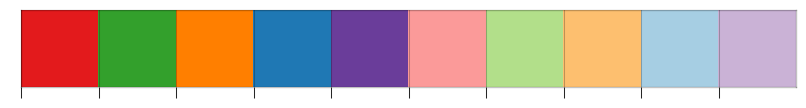

In [25]:
pal = sns.color_palette(
    [
        "#E31A1C",
        "#33A02C",
        "#FF7F00",
        "#1F78B4",
        "#6A3D9A",
        "#FB9A99",
        "#B2DF8A",
        "#FDBF6F",
        "#A6CEE3",
        "#CAB2D6",
    ]
)
sns.palplot(pal)
print(pal.as_hex())

#### Load in example data
- Will just do up histograms, barcharts, and wordclouds for now - don't think there are any other vizzes for textual analysis

In [26]:
example_data = sns.load_dataset("titanic")

In [27]:
example_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#### Example bar chart

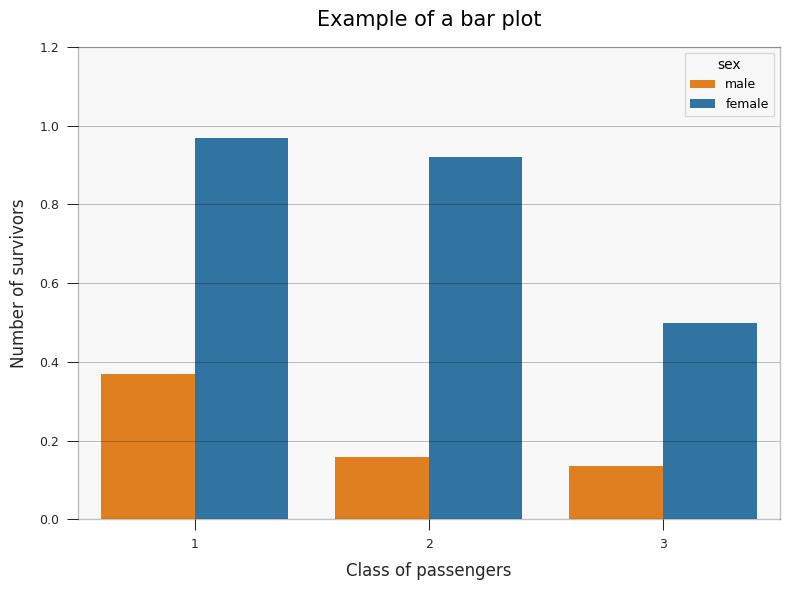

In [28]:
fig, ax = plt.subplots(1, 1)

# take any of the colours from above
sns.barplot(
    data=example_data,
    x="pclass",
    y="survived",
    hue="sex",
    ax=ax,
    ci=None,
    palette=pal.as_hex()[2:4],
)
ax.set_title("Example of a bar plot", fontsize=15)
ax.set_xlabel("Class of passengers")
ax.set_ylabel("Number of survivors")
ax.set_ylim(bottom=0, top=1.2)
plt.tight_layout()

#### Example histogram chart

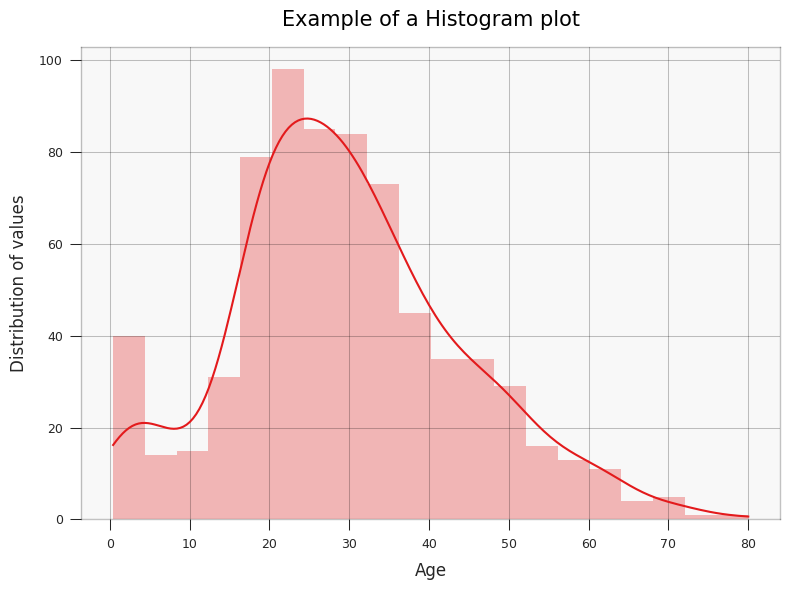

In [29]:
fig, ax = plt.subplots(1, 1)

sns.histplot(
    data=example_data,
    x="age",
    ax=ax,
    edgecolor=None,
    element="step",
    kde=True,
    alpha=0.3,
)

ax.set_title("Example of a Histogram plot", fontsize=15)

ax.set_xlabel("Age")
ax.set_ylabel("Distribution of values")
plt.tight_layout()

In [30]:
example_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

#### Wordcloud

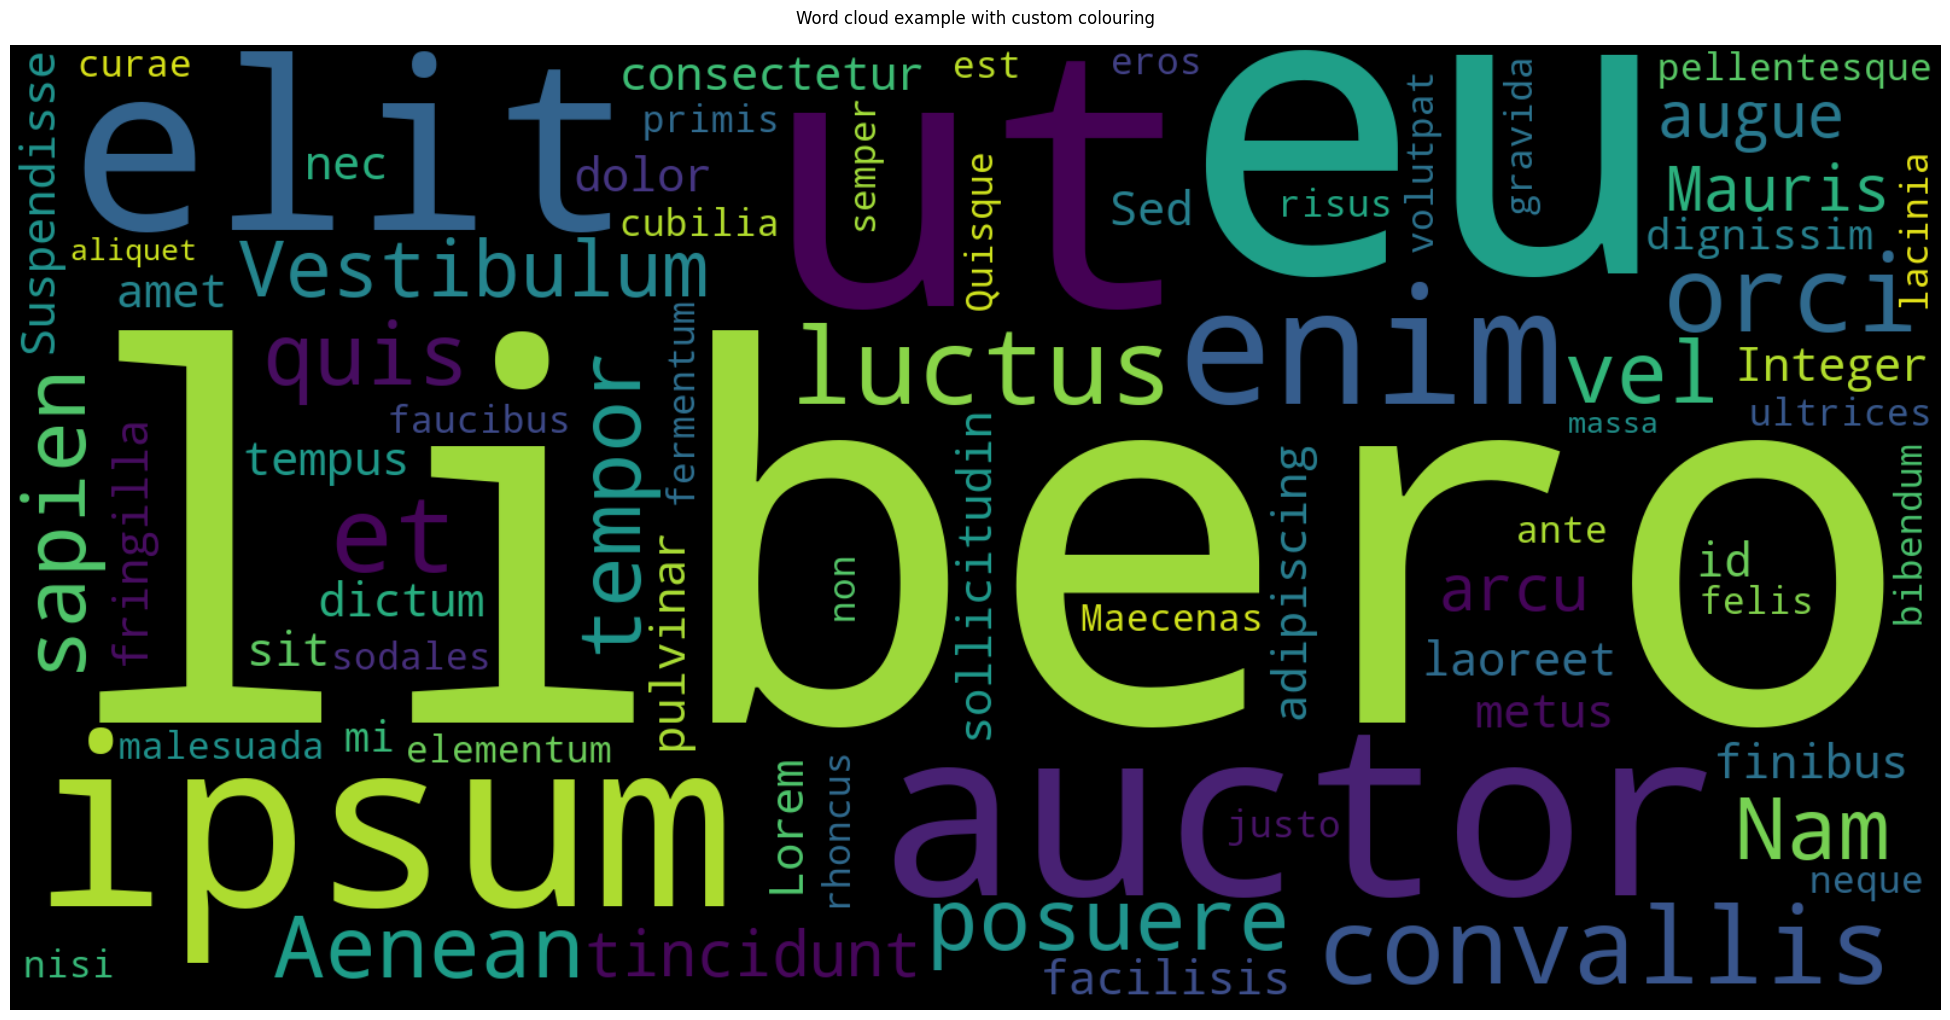

In [31]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse auctor enim libero, at convallis orci luctus et. Sed finibus metus eu fringilla laoreet. Integer posuere pulvinar facilisis. Nam tempor libero quis dictum tempus. Nam tempor id sapien vel sollicitudin. Aenean nec dignissim mi. Vestibulum convallis pellentesque nisi eu elementum. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae; In malesuada eros ut risus tincidunt auctor. Maecenas arcu elit, sodales non bibendum eu, rhoncus at augue. Quisque a est arcu. Mauris neque justo, lacinia ut fermentum a, tincidunt in felis. Aenean a gravida enim, in volutpat libero. Mauris vel sapien a augue semper aliquet ut quis massa."
stopwords = set(STOPWORDS)

wc = WordCloud(
    width=1600,
    height=800,
    max_words=100,
    stopwords=stopwords,
    margin=10,
    random_state=123,
).generate(text)


def grey_color_func(
    word, font_size, position, orientation, random_state=None, **kwargs
):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


default_colors = wc.to_array()
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.title("Word cloud example with custom colouring")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)

### Confusion matrix

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from sklearn.metrics import classification_report, confusion_matrix

# create confusion matrix heatmap function
def call_confusion_matrix(y_true: List, y_pred: List) -> None:
    cm = confusion_matrix(y_true, y_pred)
    _, ax = plt.subplots(figsize=(8,6))
    
    sns.heatmap(cm,
                cmap= "YlGnBu", 
                annot=True, 
                fmt="", 
                ax=ax,
                xticklabels=["Negative", "Positive"], 
                yticklabels=["Negative", "Positive"])
    plt.show
    plt.xlabel("Predicted Result")
    plt.ylabel("Actual Result")
    plt.title("Confusion matrix here", fontsize=15)
    plt.tight_layout()

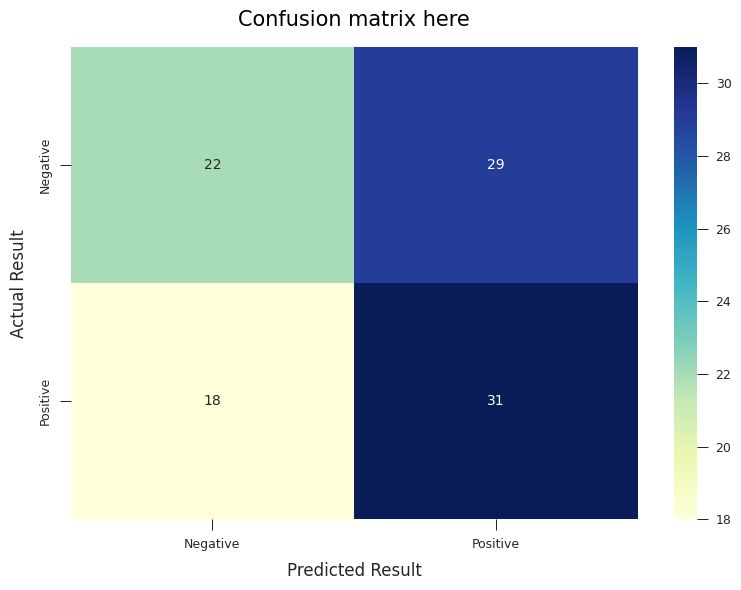

In [33]:
import numpy as np 
y_true = np.random.randint(low=0, high=2, size=100)
y_pred = np.random.randint(low=0, high=2, size=100)

call_confusion_matrix(y_true, y_pred)